# Impleament K-Means

K-means is one of the Clustering algorithm that We use.

### Import Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Build Random Dataset

In [2]:
X = np.random.randint(100, size=(300,2))
X[:5,:]

array([[72, 82],
       [37, 14],
       [12, 20],
       [43, 20],
       [77, 99]])

In [3]:
X.shape

(300, 2)

### Plot Dataset

<ipython-input-4-3c893185c526>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap='hot')


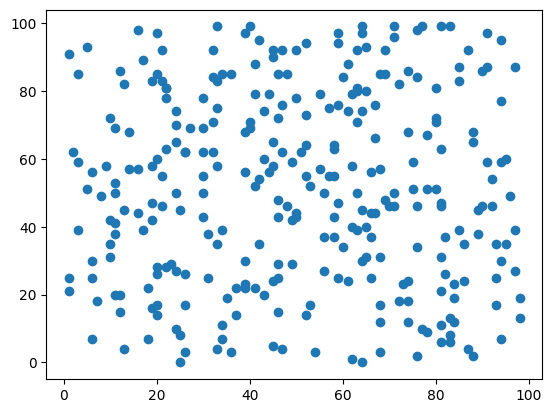

In [4]:
# Scatter plot
plt.scatter(X[:,0], X[:, 1], cmap='hot')
# Display the plot
plt.show()

### Choose K: Number of Cluster

Note that the K is a matirx with k*n dimension

In [5]:
number_of_cluster = int(input("Enter Number of Cluster: "))
m, n = X.shape
K = np.random.randint(100, size=(number_of_cluster,n))
K

Enter Number of Cluster: 3


array([[32,  9],
       [44, 77],
       [36, 39]])

### Impleament Essential Functions For K-means Algorithm

K-means algorithm has two important funtion:

- find closest cluster centroid
- move cluster centroids

### Find Closest Centroids

* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm

In [6]:
def find_closet_centroids(X, K):
  idx = np.zeros(X.shape[0], dtype=int)
  for i in range(X.shape[0]):
    a = X[i] - K
    idx[i] = np.argmin(np.linalg.norm(a, axis=1))
  return idx

### Compute Centroids

In this function we recompute centroids
* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [7]:
def compute_centroids(X, K, idx):
  centroids = np.zeros((K.shape[0], X.shape[1]))
  for cluster in range(K.shape[0]):
    index_of_k = np.where(idx == cluster)[0]
    for i in index_of_k:
      centroids[cluster] += X[i]
    centroids[cluster] /= len(index_of_k)
  return centroids

In [8]:
def plot_data_with_centroids(X, centroids, idx):
  plt.scatter(X[idx==0, 0], X[idx==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(X[idx==1, 0], X[idx==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(X[idx==2, 0], X[idx==2, 1], s=100, c='green', label ='Cluster 3')
  # Scatter plot
  plt.scatter(X[:,0], X[:, 1], cmap='hot')
  plt.plot(centroids[:,0], centroids[:, 1], marker='*', ls='none', ms=10, color='yellow')
  # Display the plot
  plt.title('Clusterstering')
  plt.show()

### Calculate Cost function(Distortion)

In [9]:
def calculate_cost(X, K, idx):
  m, n = X.shape
  k = K.shape[0]
  cost = 0.
  for i in range(m):
    cost += np.linalg.norm(X[i] - K[idx[i]])**2
  cost /= m
  return cost

### Run K-Means

In [10]:
def run_k_means(X, initial_k, max_iters):
  cost = []
  idx = find_closet_centroids(X, initial_k)
  cost.append(calculate_cost(X, initial_k, idx))
  centroids = compute_centroids(X, initial_k, idx)
  for i in range(max_iters - 1):
    idx = find_closet_centroids(X, centroids)
    cost.append(calculate_cost(X, centroids, idx))
    centroids = compute_centroids(X, centroids, idx)

  return centroids, idx, cost

<ipython-input-8-d714e9f59956>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap='hot')


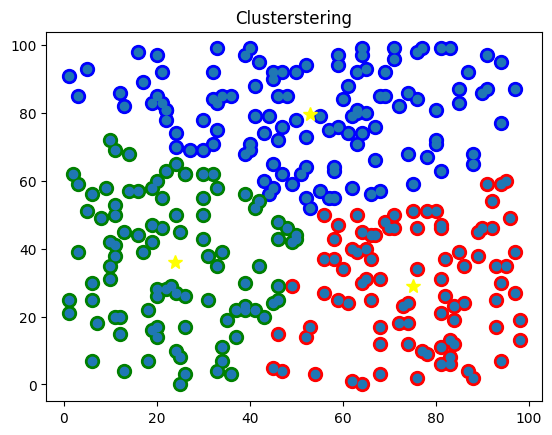

In [11]:
max_iters = 20
centroids, idx, cost = run_k_means(X, K, max_iters)
plot_data_with_centroids(X, centroids, idx)

### Plot Cost By Iteration 

<function matplotlib.pyplot.show(close=None, block=None)>

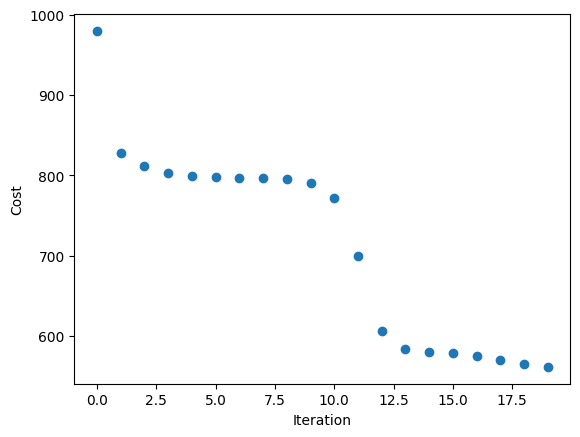

In [12]:
plt.scatter(np.arange(max_iters), cost)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show

### Elbow

One of the key point in k-means algorithm is that how to choose $k$? One way th choose $k$ is Elbow. Through $k = 1$ to $10$ We run k-means and calculate cost for each $k$. Finaly plot Graph of Cost by $K$

In [13]:
def elbow(X):
  lowest_cost = []
  m, n = X.shape
  max_iters = 10
  for k in range(10):
    K = K = np.random.randint(100, size=(k+1,n))
    centroids, idx, cost = run_k_means(X, K, max_iters)
    lowest_cost.append(np.min(cost))
  return lowest_cost

In [14]:
cost_j = elbow(X)

<function matplotlib.pyplot.show(close=None, block=None)>

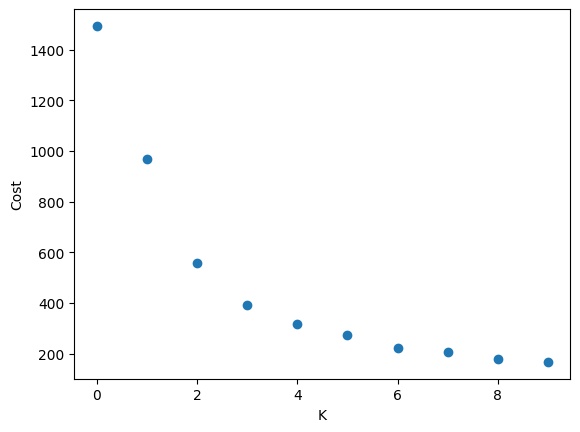

In [15]:
plt.scatter(np.arange(10), cost_j)
plt.xlabel("K")
plt.ylabel("Cost")
plt.show

As you can see the cost decreasing rapidly until $K = 3$. After that decrease more slowly so We choose $K$ to be $3$

### Use Sklearn Library

<ipython-input-8-d714e9f59956>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap='hot')


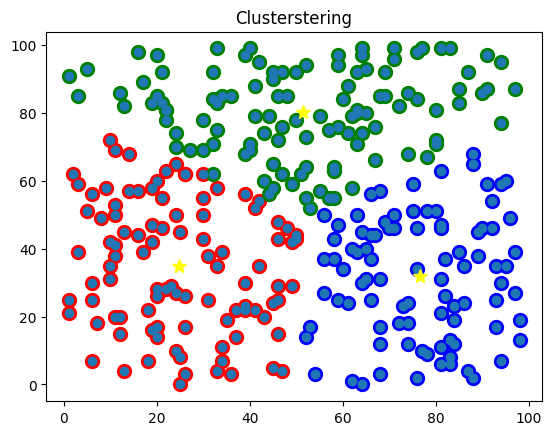

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=20, n_init=10, random_state=0)
idx = kmeans.fit_predict(X)
plot_data_with_centroids(X, kmeans.cluster_centers_, idx)